In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [2]:
tsv_infile = 'data/eleanor/8.tsv'

df = pd.read_csv(tsv_infile, encoding='utf-16', sep='\t',
                names=['file_id', 'word', 'word_start', 'word_end',
                        'utt_num', 'utt_start', 'utt_end', 'utt_dur'])

# print(df)
file_id_list = sorted(df['file_id'].unique())
# print(len(file_id_list))

In [80]:
spkr_dict = {}  # spkr_dict[spkr_id][urum, russ, mix] = int
utt_words = defaultdict(list)
# iterate utt by utt
for file_id in file_id_list:
#     print(file_id)
    spkr_id = file_id.split('-')[-1]  # ex. 'A01'
    if spkr_id not in spkr_dict:
        spkr_dict[spkr_id] = defaultdict(int)

    file_df = df[df['file_id'] == file_id]
#     print(file_df)
    current_utt_idx = 1

    last_utt_idx = file_df['utt_num'].iloc[-1]
    # print(last_utt_idx)

    while current_utt_idx <= last_utt_idx:
        utt_rows_df = file_df[file_df['utt_num'] == current_utt_idx]
        # print(len(utt_rows_df))
#         print(utt_rows_df)

        # if only 1 row, it's either <p:> (skip), or <<fm>>
        if len(utt_rows_df) == 1:
#             print(current_utt_idx, utt_rows_df['word'].iloc[0])
            # import pdb; pdb.set_trace()
            if utt_rows_df['word'].iloc[0] == '<p:>':
                current_utt_idx += 1
                continue
            if utt_rows_df['word'].iloc[0] == '<<fm>>':
                spkr_dict[spkr_id]['russ'] += 1
                print(spkr_dict[spkr_id]['russ'])
                current_utt_idx += 1
                continue

        # check if there's any FM in here.
        # possibly all words are tagged with FM
        utt_word_list = utt_rows_df['word']
        keep_words = [keep for keep in utt_word_list 
                      if keep not in ['<p:>', '<<fp>>', '<<ui>>', '<<fs>>']]
        if not keep_words:
            current_utt_idx += 1
            continue
        is_russ = False
        is_urum = False
        for word in keep_words:
            if word.startswith('<<fm>'):
                is_russ = True
            else:
                is_urum = True

        if is_russ and is_urum:
            spkr_dict[spkr_id]['mix'] += 1
            utt_words['mix'].append(keep_words)
            # print(f'MIX: {keep_words}')
        elif is_russ:
            spkr_dict[spkr_id]['russ'] += 1
            utt_words['russ'].append(keep_words)
            # print(f'RUSS: {keep_words}')
        elif is_urum:
            spkr_dict[spkr_id]['urum'] += 1
            utt_words['urum'].append(keep_words)
            # print(f'URUM: {keep_words}')
        else:
            print('none of the above')
            print(keep_words)

        current_utt_idx += 1
#     break

1
2
1
2
3
4
3
3
1
3


In [81]:
# write utt_words to file
with open('data/all_utts_by_lang.txt', 'w') as w:
    for lang, utt_list in utt_words.items():
        w.write(f'{lang} *****\n')
        for utt in utt_list:
            w.write(' '.join(utt) + '\n')
        w.write('\n\n')

In [82]:
# count total utts
total_utts = 0
for spkr in spkr_dict:
    for lang_count in spkr_dict[spkr].values():
        total_utts += lang_count
print(total_utts)

1375


In [83]:
# count all utts by lang
lang_dict = defaultdict(int)
for spkr in spkr_dict:
    for lang, lang_count in spkr_dict[spkr].items():
        lang_dict[lang] += lang_count
print(lang_dict)

defaultdict(<class 'int'>, {'urum': 753, 'mix': 582, 'russ': 40})


In [84]:
# count lang use across speakers
urum_only = 0
russ_only = 0
mix_ct = 0
for spkr in spkr_dict:
    langs = spkr_dict[spkr].keys()
    if 'mix' in langs:
        mix_ct += 1
#         print(f'MIX SPKR: {spkr}')
    elif 'urum' in langs:
        urum_only += 1
    elif 'russ' in langs:
        russ_only += 1
    else:
        print(f'empty speaker? {spkr}')  # doesn't hit
        
print(f'urum: {urum_only}')
print(f'russ: {russ_only}')
print(f'mix: {mix_ct}')

urum: 1
russ: 0
mix: 29


In [50]:
print(spkr_dict.keys())  # B05 and B15 not present in doreco textgrids)

dict_keys(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'B01', 'B02', 'B03', 'B04', 'B06', 'B07', 'B08', 'B10', 'B11', 'B12', 'B13', 'B14', 'B16', 'B09'])


In [85]:
spkr_dict

{'A01': defaultdict(int, {'urum': 25, 'mix': 25, 'russ': 2}),
 'A02': defaultdict(int, {'urum': 29, 'mix': 28, 'russ': 6}),
 'A03': defaultdict(int, {'mix': 47, 'russ': 8, 'urum': 16}),
 'A04': defaultdict(int, {'mix': 22, 'urum': 35}),
 'A05': defaultdict(int, {'urum': 22, 'russ': 7, 'mix': 27}),
 'A06': defaultdict(int, {'urum': 31, 'mix': 25, 'russ': 1}),
 'A07': defaultdict(int, {'mix': 40, 'urum': 18, 'russ': 2}),
 'A08': defaultdict(int, {'urum': 25, 'mix': 24, 'russ': 2}),
 'A09': defaultdict(int, {'mix': 32, 'urum': 28, 'russ': 3}),
 'A10': defaultdict(int, {'urum': 30, 'mix': 27}),
 'A11': defaultdict(int, {'mix': 23, 'russ': 2, 'urum': 18}),
 'A12': defaultdict(int, {'urum': 28, 'mix': 19}),
 'A13': defaultdict(int, {'urum': 26, 'mix': 27}),
 'A14': defaultdict(int, {'mix': 33, 'urum': 12}),
 'A15': defaultdict(int, {'urum': 21, 'mix': 18, 'russ': 1}),
 'A16': defaultdict(int, {'urum': 28, 'mix': 41}),
 'B01': defaultdict(int, {'urum': 30, 'mix': 13}),
 'B02': defaultdict(int

In [86]:
# visualize utt langs by speaker
cols = ['spkr', 'Urum only', 'Code-switched', 'Russian only']
sorted_spkrs = sorted(spkr_dict.keys())
urum_utts_by_spkr = [spkr_dict[spkr]['urum'] if 'urum' in spkr_dict[spkr] else 0 for spkr in sorted_spkrs]
russ_utts_by_spkr = [spkr_dict[spkr]['russ'] if 'russ' in spkr_dict[spkr] else 0 for spkr in sorted_spkrs]
mix_utts_by_spkr = [spkr_dict[spkr]['mix'] if 'mix' in spkr_dict[spkr] else 0 for spkr in sorted_spkrs]

utt_langs_by_spkr_df = pd.DataFrame({'spkr': sorted_spkrs, 
                                  'Urum only': urum_utts_by_spkr,
                                 'Code-switched': mix_utts_by_spkr, 
                                  'Russian only': russ_utts_by_spkr})

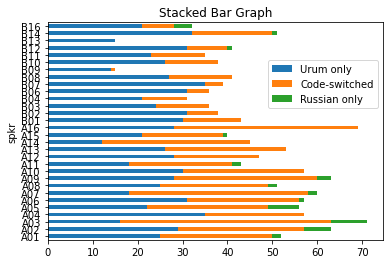

In [87]:
ax = utt_langs_by_spkr_df.plot( 
        x = 'spkr', 
        kind = 'barh', 
        stacked = True, 
        title = 'Stacked Bar Graph', 
        mark_right = True) 
ax.legend(bbox_to_anchor=(1.0, 0.85))